# Data Manipulation with pandas
Run the hidden code cell below to import the data used in this course.

In [163]:
# Import the course packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import the four datasets
avocado = pd.read_csv("./datasets/avocado.csv")
homelessness = pd.read_csv("./datasets/homelessness.csv")
temperatures = pd.read_csv("./datasets/temperatures.csv")
walmart = pd.read_csv("./datasets/walmart.csv")

## Take Notes

Add notes about the concepts you've learned and code cells with code you want to keep.

_Add your notes here_

In [164]:
# Add your code snippets here

## Explore Datasets
Use the DataFrames imported in the first cell to explore the data and practice your skills!



- Print the highest weekly sales for each `department` in the `walmart` DataFrame. Limit your results to the top five departments, in descending order. If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/aggregating-dataframes?ex=1).

In [165]:
display(walmart.head())

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808


In [166]:
departments = walmart.groupby("department")["weekly_sales"].sum()
print(departments.loc[:5].sort_values(ascending=False))

department
2    10278723.28
4     6460308.53
5     5355216.00
1     4615555.27
3     2632088.25
Name: weekly_sales, dtype: float64


- What was the total `nb_sold` of organic avocados in 2017 in the `avocado` DataFrame? If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/slicing-and-indexing-dataframes?ex=6).

In [167]:
display(avocado.head())

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56


In [168]:
total = avocado[(avocado["type"] == "organic") & (avocado["year"] == 2017)]["nb_sold"].sum()
print(f"Total number of organic avocados sold in 2017: ${total}")

Total number of organic avocados sold in 2017: $23321281.07


- Create a bar plot of the total number of homeless people by region in the `homelessness` DataFrame. Order the bars in descending order. Bonus: create a horizontal bar chart. If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/creating-and-visualizing-dataframes?ex=1).

In [169]:
display(homelessness.head())

,region,state,individuals,family_members,state_pop
0,East South Central,Alabama,2570.0,864.0,4887681
1,Pacific,Alaska,1434.0,582.0,735139
2,Mountain,Arizona,7259.0,2606.0,7158024
3,West South Central,Arkansas,2280.0,432.0,3009733
4,Pacific,California,109008.0,20964.0,39461588


In [170]:
number_of_homeless_people_by_region = homelessness.groupby("region")["state_pop"].sum().sort_values(ascending=False)
print(number_of_homeless_people_by_region)

region
South Atlantic        65229624
Pacific               53323075
East North Central    46886387
Mid-Atlantic          41217298
West South Central    40238324
Mountain              24511745
West North Central    21350241
East South Central    19101485
New England           14829322
Name: state_pop, dtype: int64


In [171]:
# Drop montain from the index
number_of_homeless_people_by_region = number_of_homeless_people_by_region.drop("Mountain")

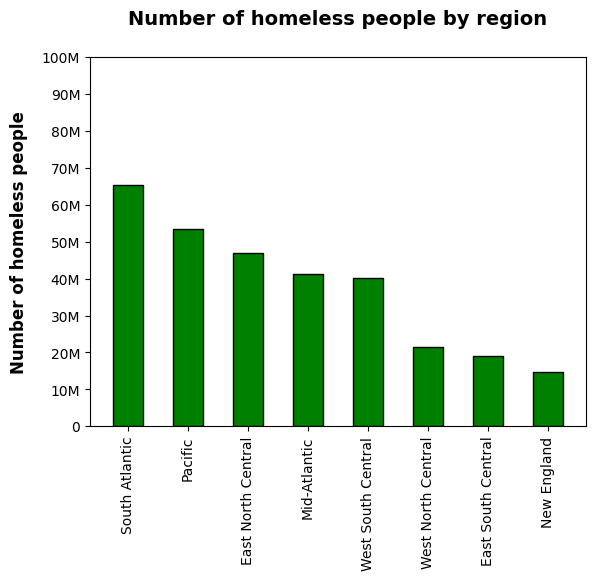

In [172]:
# Create a bar plot
plt.bar(number_of_homeless_people_by_region.index, number_of_homeless_people_by_region.values, color="green", edgecolor="black", linewidth=1, width=0.5)
# Set the title and labels of the plot
plt.title("Number of homeless people by region", fontsize=14, fontweight="bold", y=1.05, x=0.5, pad=10)
plt.ylabel("Number of homeless people", fontsize=12, fontweight="bold", labelpad=10, x=-0.05, y=0.5)
plt.xticks(rotation=90)
plt.yticks(np.arange(0, 100000001, 10000000), ["0", "10M", "20M", "30M", "40M", "50M", "60M", "70M", "80M", "90M", "100M"])
# Show the plot
plt.show()

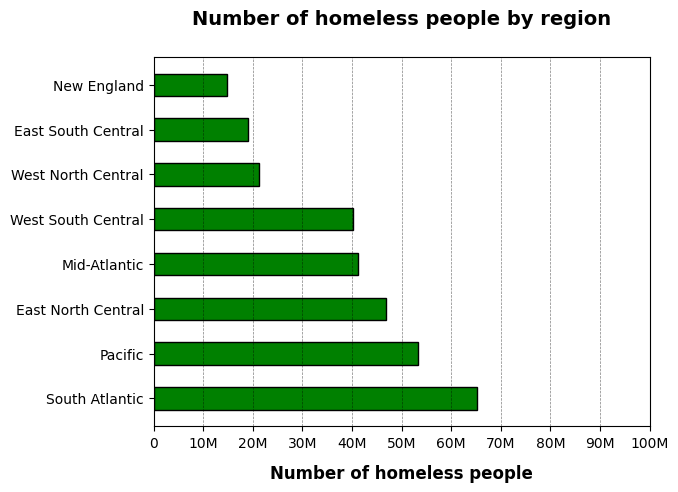

In [173]:
# Create a horizontal bar plot
plt.barh(number_of_homeless_people_by_region.index, number_of_homeless_people_by_region.values, color="green", edgecolor="black", linewidth=1, height=0.5)
# Set the title and labels of the plot
plt.title("Number of homeless people by region", fontsize=14, fontweight="bold", y=1.05, x=0.5, pad=10)
plt.xlabel("Number of homeless people", fontsize=12, fontweight="bold", labelpad=10, x=0.5, y=-0.05)
plt.xticks(np.arange(0, 100000001, 10000000), ["0", "10M", "20M", "30M", "40M", "50M", "60M", "70M", "80M", "90M", "100M"])
plt.grid(axis="x", linestyle="--", linewidth=0.5, color="black", alpha=0.5)
# Show the plot
plt.show()

- Create a line plot with two lines representing the temperatures in Toronto and Rome. Make sure to properly label your plot. Bonus: add a legend for the two lines. If you're stuck, try reviewing this [video](https://campus.datacamp.com/courses/data-manipulation-with-pandas/creating-and-visualizing-dataframes?ex=1).

In [174]:
display(temperatures.head())

,date,city,country,avg_temp_c
0,2000-01-01,Abidjan,Côte D'Ivoire,27.293
1,2000-02-01,Abidjan,Côte D'Ivoire,27.685
2,2000-03-01,Abidjan,Côte D'Ivoire,29.061
3,2000-04-01,Abidjan,Côte D'Ivoire,28.162
4,2000-05-01,Abidjan,Côte D'Ivoire,27.547


In [175]:
toronto = temperatures[temperatures["city"] == "Toronto"]
rome = temperatures[temperatures["city"] == "Rome"]